# Doing Data Science using open world data from the World Data Bank
### by Andrea Hinojosa Albornoz, Manuel Kanahuati Ceballos and Andrés Robles Arce

## Abstract 

#### GDP is the Gross Domestic Product of a country and is used internationally to know and compare economic growth. We chose 7 variables (Research and Development, Market Capitalization, Exports, Taxes, CO2 Emission, Population) which we processed in Python to determine which socioeconomic variables have the greatest impact on the GDP of each country? ####

## Getting started

For this workshop, we"ll be using the next libraries:


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import io
from io import StringIO
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, ggtitle ,geom_line ,facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

## Data gathering




We'll be working with seven open datasets:



1.   **CO2 emissions (metric tons per capita)** https://datos.bancomundial.org/indicador/EN.ATM.CO2E.PC?view=chart 
2.   **Expenditure on research and development (% of GDP)** https://datos.bancomundial.org/indicador/GB.XPD.RSDV.GD.ZS?view=chart 
3.   **Exports of goods and services (% of GDP)** https://datos.bancomundial.org/indicador/NE.EXP.GNFS.ZS?view=chart 
4.   **GDP per capita (US$)** https://datos.bancomundial.org/indicador/NY.GDP.PCAP.CD?view=chart 
5.   **Market Capitalization of National Publicly Traded Companies (Current USD)** https://datos.bancomundial.org/indicador/CM.MKT.LCAP.CD 
6.   **Tax revenue (% of GDP)** https://datos.bancomundial.org/indicador/GC.TAX.TOTL.GD.ZS?view=chart 
7.   **Total population** https://datos.bancomundial.org/indicador/SP.POP.TOTL?view=chart 


#### Load data into development environment

For this stage, we'll be loading it directly from the local environment. We created a spreadsheet with the seven datasets called BASE_FINAL



In [ ]:
#Save each of the variables in a pandas dataframe
df_rd = pd.read_excel('./BASE FINAL.xlsx', sheet_name='R&D')
df_pib = pd.read_excel('./BASE FINAL.xlsx', sheet_name='PIB')
df_exportaciones = pd.read_excel('./BASE FINAL.xlsx', sheet_name='Exportaciones')
df_MARKETCAP = pd.read_excel('./BASE FINAL.xlsx', sheet_name='MARKETCAP')
df_impuestos = pd.read_excel('./BASE FINAL.xlsx', sheet_name='Impuestos')
df_CO2 = pd.read_excel('./BASE FINAL.xlsx', sheet_name='CO2')
df_poblacion = pd.read_excel('./BASE FINAL.xlsx', sheet_name='Población')

In [ ]:
#Take year 2011 of each variable and change column names
#we specifically chose the year 2011 because it is the year with the most records in all the variables.
df_rd = df_rd[['Country Name','Country Code',2011]]
df_rd.rename(columns = {2011:'R&D'}, inplace = True)
df_pib = df_pib[['Country Name','Country Code',2011]]
df_pib.rename(columns = {2011:'PIB'}, inplace = True)
df_exportaciones = df_exportaciones[['Country Name','Country Code',2011]]
df_exportaciones.rename(columns = {2011:'Exportaciones'}, inplace = True)
df_MARKETCAP = df_MARKETCAP[['Country Name','Country Code',2011]]
df_MARKETCAP.rename(columns = {2011:'MARKETCAP'}, inplace = True)
df_impuestos = df_impuestos[['Country Name','Country Code',2011]]
df_impuestos.rename(columns = {2011:'Impuestos'}, inplace = True)
df_CO2 = df_CO2[['Country Name','Country Code',2011]]
df_CO2.rename(columns = {2011:'CO2'}, inplace = True)
df_poblacion = df_poblacion[['Country Name','Country Code',2011]]
df_poblacion.rename(columns = {2011:'Población'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#We join all the dataframes into one
df = df_rd
df = df.merge(df_pib, how='inner', on=['Country Name', 'Country Code'])
df = df.merge(df_exportaciones, how='inner', on=['Country Name', 'Country Code'])
df = df.merge(df_MARKETCAP, how='inner', on=['Country Name', 'Country Code'])
df = df.merge(df_impuestos, how='inner', on=['Country Name', 'Country Code'])
df = df.merge(df_CO2, how='inner', on=['Country Name', 'Country Code'])
df = df.merge(df_poblacion, how='inner', on=['Country Name', 'Country Code'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   263 non-null    object 
 1   Country Code   265 non-null    object 
 2   R&D            118 non-null    float64
 3   PIB            257 non-null    float64
 4   Exportaciones  233 non-null    float64
 5   MARKETCAP      112 non-null    float64
 6   Impuestos      157 non-null    float64
 7   CO2            238 non-null    float64
 8   Población      264 non-null    float64
dtypes: float64(7), object(2)
memory usage: 20.7+ KB


In [ ]:
#As a lot of our rows have null values we will get rid of them
df.dropna(subset = ['Country Name'], inplace=True)
df.dropna(subset = ['R&D'], inplace=True)
df.dropna(subset = ['PIB'], inplace=True)
df.dropna(subset = ['Exportaciones'], inplace=True)
df.dropna(subset = ['MARKETCAP'], inplace=True)
df.dropna(subset = ['Impuestos'], inplace=True)
df.dropna(subset = ['Población'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 8 to 262
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   74 non-null     object 
 1   Country Code   74 non-null     object 
 2   R&D            74 non-null     float64
 3   PIB            74 non-null     float64
 4   Exportaciones  74 non-null     float64
 5   MARKETCAP      74 non-null     float64
 6   Impuestos      74 non-null     float64
 7   CO2            74 non-null     float64
 8   Población      74 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.8+ KB


In [ ]:
df.head()

,Country Name,Country Code,R&D,PIB,Exportaciones,MARKETCAP,Impuestos,CO2,Población
8,Emiratos Árabes Unidos,ARE,0.48622,3.510000e+11,90.076571,9.372665e+10,0.321414,18.589933,8946778.0
9,Argentina,ARG,0.56597,5.300000e+11,18.449209,4.357979e+10,12.663628,4.296015,41261490.0
13,Australia,AUS,2.23765,1.400000e+12,21.445055,1.200000e+12,20.331998,17.268110,22340024.0
14,Austria,AUT,2.66868,4.310000e+11,53.948671,8.526952e+10,25.427985,8.135475,8391643.0
17,Bélgica,BEL,2.17332,5.230000e+11,80.697363,2.290000e+11,24.936657,8.658064,11038264.0


In [ ]:
#Convert data to same units: per capita and in USD dollars
#Except: total population (# persons) and CO2 (ton per capita)
df['R&D'] = (df['R&D']/df['Población']*df['PIB'])/100
df['PIB_new'] = df['PIB']/df['Población']
df['Exportaciones'] = (df['Exportaciones']/df['Población']*df['PIB'])/100
df['MARKETCAP'] = df['MARKETCAP']/df['Población']
df['Impuestos'] = (df['Impuestos']/df['Población']*df['PIB'])/100
df.head()

,Country Name,Country Code,R&D,PIB,Exportaciones,MARKETCAP,Impuestos,CO2,Población,PIB_new
8,Emiratos Árabes Unidos,ARE,190.753833,3.510000e+11,35338.840967,10476.022765,126.097089,18.589933,8946778.0,39232.000615
9,Argentina,ARG,72.698320,5.300000e+11,2369.783750,1056.185562,1626.631196,4.296015,41261490.0,12844.906958
13,Australia,AUS,1402.285870,1.400000e+12,13439.142416,53715.251156,12741.614730,17.268110,22340024.0,62667.793016
14,Austria,AUT,1370.650634,4.310000e+11,27708.372647,10161.242560,13059.971278,8.135475,8391643.0,51360.621514
17,Bélgica,BEL,1029.732900,5.230000e+11,38234.926073,20746.015859,11815.147302,8.658064,11038264.0,47380.638840


## Exploratory analysis

Exploratory analysis of each independent variable and their relation with our dependant variable (GDP)

#### R&D Expense (USD per capita) and GDP (USD per capita)

In [ ]:
#PIB and R&D data per country
#Units: R&D (USD per capita) PIB_new (USD dollars per capita)
df[['Country Code', 'R&D', 'PIB_new']].head()

,Country Code,R&D,PIB_new
8,ARE,190.753833,39232.000615
9,ARG,72.698320,12844.906958
13,AUS,1402.285870,62667.793016
14,AUT,1370.650634,51360.621514
17,BEL,1029.732900,47380.638840


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


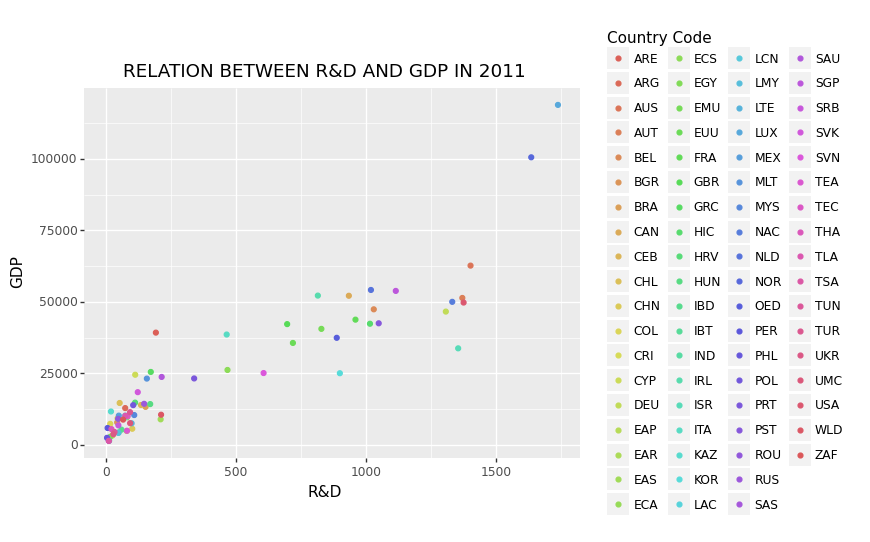

<ggplot: (8771563471081)>

In [ ]:
#Graph showing the relation between R&D and GDP
ggplot(df) + aes(x="R&D", y="PIB_new", color="Country Code") + geom_point() + ggtitle("RELATION BETWEEN R&D AND GDP IN 2011") + labs(y = "GDP", x = "R&D")

**Interpretation:** The graph shows a clear positive relation between R&D and GDP. In some countries if R&D Expense (USD per capita) increment the GDP (USD per capita) will increment too.

#### CO2 emissions (tons per capita) and GDP (USD per capita)

In [ ]:
#PIB and CO2 data per country
#Units: CO2 (emissions tonCO2 per capita) PIB_new (USD dollars per capita)
df[['Country Code', 'CO2', 'PIB_new']].head()

,Country Code,CO2,PIB_new
8,ARE,18.589933,39232.000615
9,ARG,4.296015,12844.906958
13,AUS,17.268110,62667.793016
14,AUT,8.135475,51360.621514
17,BEL,8.658064,47380.638840


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


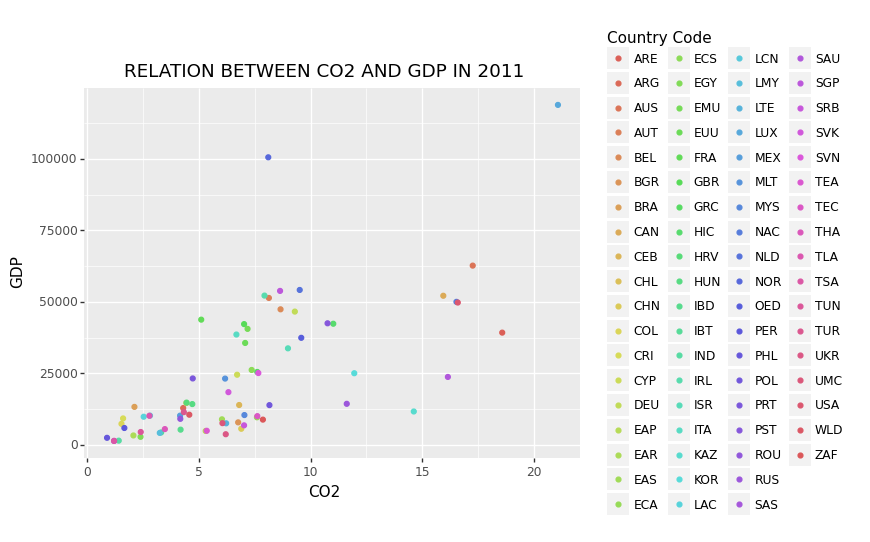

<ggplot: (8771562946733)>

In [ ]:
#Graph showing the relation between CO2 and GDP
ggplot(df) + aes(x="CO2", y="PIB_new", color="Country Code") + geom_point() + ggtitle("RELATION BETWEEN CO2 AND GDP IN 2011") + labs(y = "GDP", x = "CO2")

**Interpretation:** The graph shows in some countries a positive relation between CO2 and GDP. In some countries if CO2 emissions (ton per capita) increment the GDP (USD per capita) will increment too.

#### Exports (USD per capita) and GDP (USD per capita)

In [ ]:
#PIB and exports data per country
#Units: Exports (USD per capita) PIB_new (USD dollars per capita)
df[['Country Code', 'Exportaciones', 'PIB_new']].head()

,Country Code,Exportaciones,PIB_new
8,ARE,35338.840967,39232.000615
9,ARG,2369.783750,12844.906958
13,AUS,13439.142416,62667.793016
14,AUT,27708.372647,51360.621514
17,BEL,38234.926073,47380.638840


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


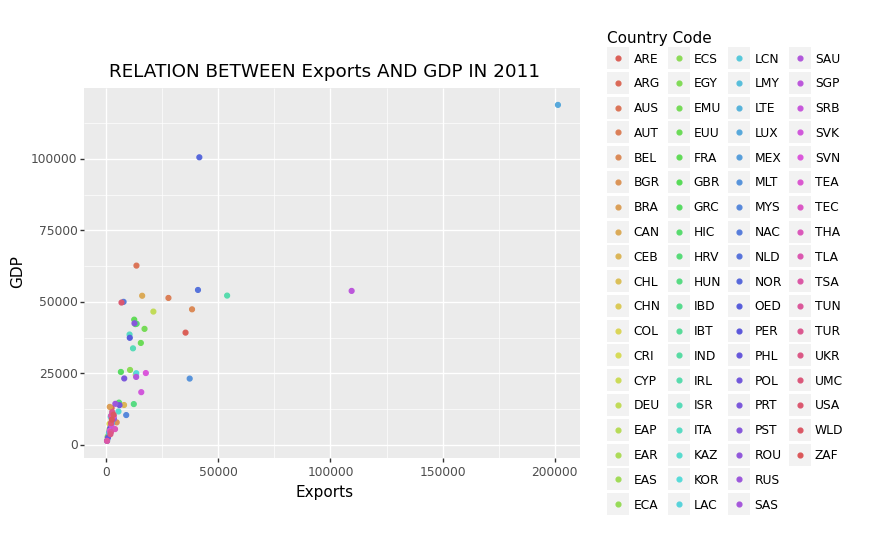

<ggplot: (8771561203529)>

In [ ]:
#Graph showing the relation between exports and GDP
ggplot(df) + aes(x="Exportaciones", y="PIB_new", color="Country Code") + geom_point() + ggtitle("RELATION BETWEEN Exports AND GDP IN 2011") + labs(y = "GDP", x = "Exports")

**Interpretation:** The graph shows a clear positive relation between exports and GDP. In some countries if exports (USD per capita) increment the GDP (USD per capita) will increment too.

#### MARKETCAP (USD per capita) and GDP

In [ ]:
#GDP and MARKETCAP data per country
#Units: MARKETCAP (USD per capita) PIB_new (USD dollars per capita)
df[['Country Code', 'MARKETCAP', 'PIB_new']].head()

,Country Code,MARKETCAP,PIB_new
8,ARE,10476.022765,39232.000615
9,ARG,1056.185562,12844.906958
13,AUS,53715.251156,62667.793016
14,AUT,10161.242560,51360.621514
17,BEL,20746.015859,47380.638840


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


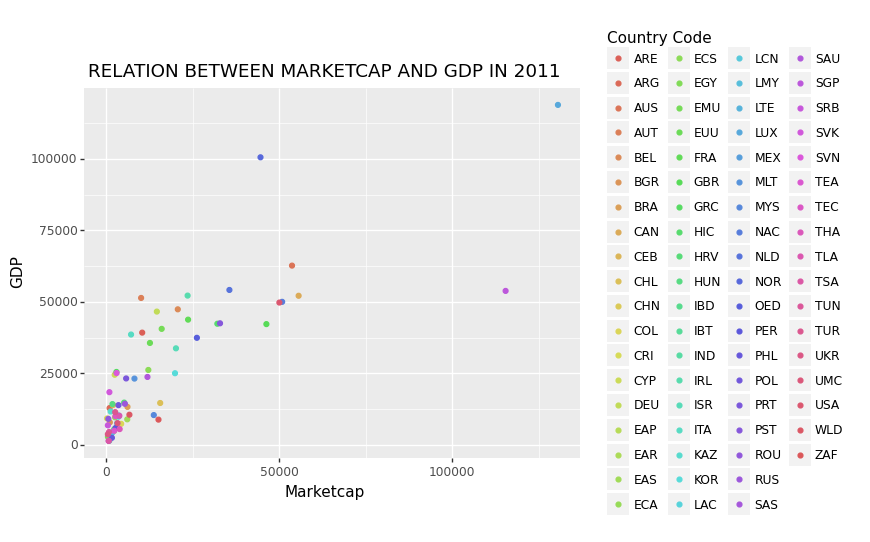

<ggplot: (8771561121457)>

In [ ]:
#Graph showing the relation between MARKETCAP and GDP
ggplot(df) + aes(x="MARKETCAP", y="PIB_new", color="Country Code") + geom_point() + ggtitle("RELATION BETWEEN MARKETCAP AND GDP IN 2011") + labs(y = "GDP", x = "Marketcap")

**Interpretation:** The graph shows in some countries a positive relation between MARKETCAP and GDP. In some countries if MARKETCAP (USD per capita) increment the GDP (USD per capita) will increment too.

#### Tax collection (USD per capita) and GDP

In [ ]:
#GDP and Tax data per country
#Units: Tax collection (USD per capita) PIB_new (USD dollars per capita)
df[['Country Code', 'Impuestos', 'PIB_new']].head()

,Country Code,Impuestos,PIB_new
8,ARE,126.097089,39232.000615
9,ARG,1626.631196,12844.906958
13,AUS,12741.614730,62667.793016
14,AUT,13059.971278,51360.621514
17,BEL,11815.147302,47380.638840


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


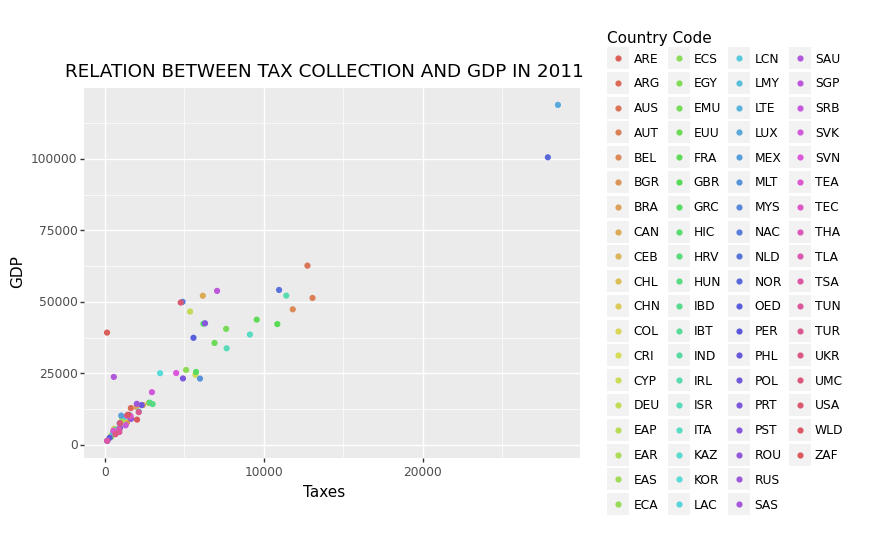

<ggplot: (8771560951049)>

In [ ]:
#Graph showing the relation between Tax collection and GDP
ggplot(df) + aes(x="Impuestos", y="PIB_new", color="Country Code") + geom_point() + ggtitle("RELATION BETWEEN TAX COLLECTION AND GDP IN 2011") + labs(y = "GDP", x = "Taxes")

**Interpretation:** The graph shows a clear positive relation between Taxes and GDP. In some countries if tax collection (USD per capita) increment the GDP (USD per capita) will increment too.

## Machine Learning Model

#### Linear Regression

A linear model makes a prediction simply by computing a weighted sum of the input variables, plus a constant called the bias term (also called the intercept), and can be expressed by the following equation:

$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$

where: 
* $\hat{y}$ is the predicted value
* $n$ is the number of variables
* $x_{i}$ is the value of the ${i}$th variable
* $\theta_{j}$ is the $j$th model coefficient (including the bias term $\theta_{0}$ and the coefficients $\theta_{1},\theta_{2}...\theta{n}$)  

In [ ]:
#Remembering our data set
df.head()

,Country Name,Country Code,R&D,PIB,Exportaciones,MARKETCAP,Impuestos,CO2,Población,PIB_new
8,Emiratos Árabes Unidos,ARE,190.753833,3.510000e+11,35338.840967,10476.022765,126.097089,18.589933,8946778.0,39232.000615
9,Argentina,ARG,72.698320,5.300000e+11,2369.783750,1056.185562,1626.631196,4.296015,41261490.0,12844.906958
13,Australia,AUS,1402.285870,1.400000e+12,13439.142416,53715.251156,12741.614730,17.268110,22340024.0,62667.793016
14,Austria,AUT,1370.650634,4.310000e+11,27708.372647,10161.242560,13059.971278,8.135475,8391643.0,51360.621514
17,Bélgica,BEL,1029.732900,5.230000e+11,38234.926073,20746.015859,11815.147302,8.658064,11038264.0,47380.638840


In [ ]:
df.PIB = df.PIB_new
df.head()

,Country Name,Country Code,R&D,PIB,Exportaciones,MARKETCAP,Impuestos,CO2,Población,PIB_new
8,Emiratos Árabes Unidos,ARE,190.753833,39232.000615,35338.840967,10476.022765,126.097089,18.589933,8946778.0,39232.000615
9,Argentina,ARG,72.698320,12844.906958,2369.783750,1056.185562,1626.631196,4.296015,41261490.0,12844.906958
13,Australia,AUS,1402.285870,62667.793016,13439.142416,53715.251156,12741.614730,17.268110,22340024.0,62667.793016
14,Austria,AUT,1370.650634,51360.621514,27708.372647,10161.242560,13059.971278,8.135475,8391643.0,51360.621514
17,Bélgica,BEL,1029.732900,47380.638840,38234.926073,20746.015859,11815.147302,8.658064,11038264.0,47380.638840


In [ ]:
# Select independent variables and dependent variable
feature_cols = ['R&D','Exportaciones','MARKETCAP','Impuestos', 'CO2']
X = df[feature_cols]
y = df['PIB']

In [ ]:
#Our independent variables
X.head()

,R&D,Exportaciones,MARKETCAP,Impuestos,CO2
8,190.753833,35338.840967,10476.022765,126.097089,18.589933
9,72.698320,2369.783750,1056.185562,1626.631196,4.296015
13,1402.285870,13439.142416,53715.251156,12741.614730,17.268110
14,1370.650634,27708.372647,10161.242560,13059.971278,8.135475
17,1029.732900,38234.926073,20746.015859,11815.147302,8.658064


In [ ]:
# Our dependant variable
y.head()

8     39232.000615
9     12844.906958
13    62667.793016
14    51360.621514
17    47380.638840
Name: PIB, dtype: float64

In [ ]:
# Split data set between data for training the model and data for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Create linear regression object
lin_reg = LinearRegression()

In [ ]:
# Fit the linear regresion model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict values of dependant variable
y_predict = lin_reg.predict(X_test)

In [ ]:
# Return the linear regression model inrercept 
lin_reg.intercept_

1585.240411767947

In [ ]:
# Return the linear regression model coefficients  
lin_reg.coef_

array([1.26677200e+01, 6.65679063e-03, 1.28116971e-01, 2.34192587e+00,
       6.52482095e+02])

In [ ]:
# Get the model score with r2
r2_score(y_test, y_predict)

0.846744247532464

#### Model results

**Coefficients:**

*   R&D Expense: **1.26677200e+01**
*   Exports: **6.65679063e-03**
*   MARKETCAP: **1.28116971e-01**
*   Tax collection: **2.34192587e+00**
*   CO2 emissions: **6.52482095e+02**



**Intercept=1585**



**R2 SCORE=0.846744247532464**

**Interpretation:**

*Coefficients:*
*   R&D Expense: For a dollar per capita that R&D Expense increases, GDP will increase by 1.26677200e+01 dollars per capita
*   Exports: For a dollar per capita that Exports increases, GDP will increase by 6.65679063e-03 dollars per capita
*   MARKETCAP: For a dollar per capita that MARKETCAP increases, GDP will increase by 1.28116971e-01 dollars per capita
*   Tax collection: For a dollar per capita that Tax Collection increases, GDP will increase by 2.34192587e+00 dollars per capita
*   CO2 emissions: For a tonCO2 per capita that CO2 emissions increases, GDP will increase by 6.52482095e+02 dollars per capita 

*Intercept*
Intercept: if all our independant variables are zero the mean value of the GDP would be 1585 USD per capita

*R2 score*
R^2 (coefficient of determination) regression score function.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

As we can notice the independent variable that has the most relation with our dependant variable (GDP) is the CO2 emissions. If CO2 emissions increments in 1 tonCO2 per capita, GDP will increase in aprox. 652 US dollars per capita.